# peek results

fld 4 not ready


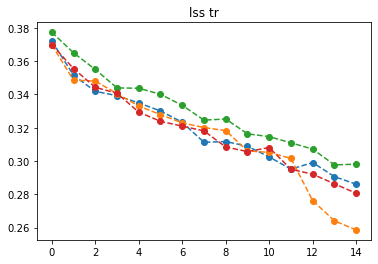

fld 4 not ready


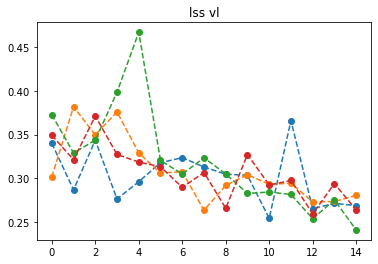

fld 4 not ready


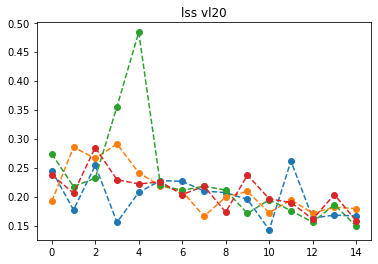

fld 4 not ready


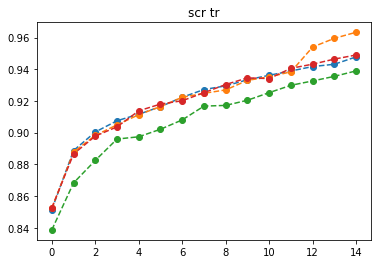

fld 4 not ready


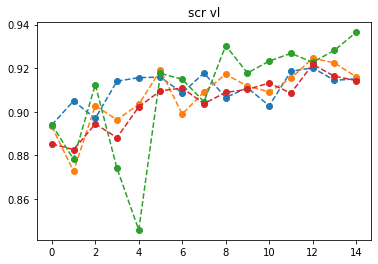

fld 4 not ready


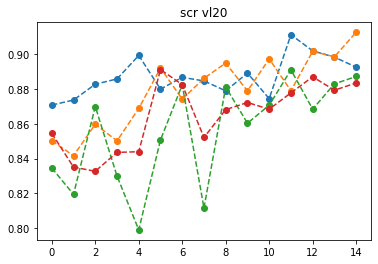

In [104]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PRFX='Mel0710B1'
EPOCHS = 15
p_out = f'../output/{PRFX}'

class Param: pass


res = pickle.load(open(f'{p_out}/results_{PRFX}.p', 'rb'))

fld2stats=res['fld2stats']

for mtrc in ['lss', 'scr']:
    for k in ['tr','vl','vl20']:
        plt.title(f'{mtrc} {k}')
        for fld in range(5):
            try:
                plt.plot(fld2stats[fld][mtrc][k], 'o--')
            except KeyError as e:
                print('fld', e, 'not ready')
        plt.show()

# submissions

In [105]:
dfsub = pd.read_csv('../input/siim-isic-melanoma-classification/sample_submission.csv')

## only last epoch

In [106]:
lst_sub = []
for fld in range(5):
    try: sub_fld = pd.read_csv(f'{p_out}/submission_{PRFX}_fld_{fld}_epc_{15-1}.csv') 
    except FileNotFoundError: continue
    print('fld', fld, sub_fld.target.mean())
    display(sub_fld.head(3))
    lst_sub.append(sub_fld.target.values)

fld 0 0.1469974972723544


,image_name,target
0,ISIC_0052060,0.062445
1,ISIC_0052349,0.054702
2,ISIC_0058510,0.068787


fld 1 0.17088818017137034


,image_name,target
0,ISIC_0052060,0.064065
1,ISIC_0052349,0.043691
2,ISIC_0058510,0.040846


fld 2 0.14004493783909977


,image_name,target
0,ISIC_0052060,0.057705
1,ISIC_0052349,0.039269
2,ISIC_0058510,0.081520


fld 3 0.14662291164660213


,image_name,target
0,ISIC_0052060,0.049314
1,ISIC_0052349,0.048677
2,ISIC_0058510,0.054500


0.15113838173235747


,image_name,target
0,ISIC_0052060,0.058382
1,ISIC_0052349,0.046584
2,ISIC_0058510,0.061413


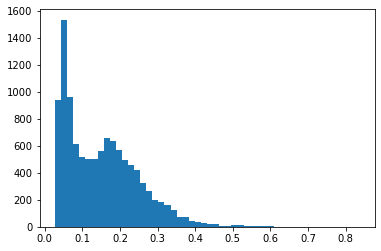

In [107]:
sub = np.mean(lst_sub,0)
print(sub.mean())
dfsub.target = sub
display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);

## only best_scr epoch

In [108]:
lst_sub = []
for fld in range(5):
    try: sub_fld = pd.read_csv(f'{p_out}/submission_{PRFX}_fld_{fld}_best.csv') 
    except FileNotFoundError: continue
    print('fld', fld, sub_fld.target.mean())
    display(sub_fld.head(3))
    lst_sub.append(sub_fld.target.values)

fld 0 0.15839839345464338


,image_name,target
0,ISIC_0052060,0.047958
1,ISIC_0052349,0.050331
2,ISIC_0058510,0.039195


fld 1 0.15779989961118232


,image_name,target
0,ISIC_0052060,0.093017
1,ISIC_0052349,0.074635
2,ISIC_0058510,0.056548


fld 2 0.14004493783909977


,image_name,target
0,ISIC_0052060,0.057705
1,ISIC_0052349,0.039269
2,ISIC_0058510,0.081520


fld 3 0.15184717111955912


,image_name,target
0,ISIC_0052060,0.071332
1,ISIC_0052349,0.058993
2,ISIC_0058510,0.058885


0.15202260050612137


,image_name,target
0,ISIC_0052060,0.067503
1,ISIC_0052349,0.055807
2,ISIC_0058510,0.059037


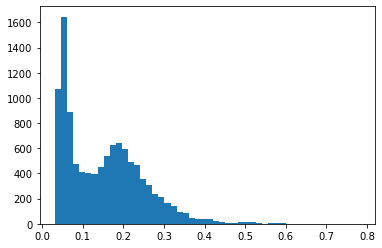

In [109]:
sub = np.mean(lst_sub,0)
print(sub.mean())
dfsub.target = sub
display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);

## avg last m epochs

In [110]:
m = 2

In [111]:
lst_sub = []
for fld in range(5):
    for epc in range(EPOCHS-m, EPOCHS):
        try: sub_fld = pd.read_csv(f'{p_out}/submission_{PRFX}_fld_{fld}_epc_{epc}.csv') 
        except FileNotFoundError: continue
        print('fld', fld, 'epc', epc, sub_fld.target.mean())
        display(sub_fld.head(3))
        lst_sub.append(sub_fld.target.values)

fld 0 epc 13 0.16331316855515335


,image_name,target
0,ISIC_0052060,0.040999
1,ISIC_0052349,0.038538
2,ISIC_0058510,0.108566


fld 0 epc 14 0.1469974972723544


,image_name,target
0,ISIC_0052060,0.062445
1,ISIC_0052349,0.054702
2,ISIC_0058510,0.068787


fld 1 epc 13 0.1663374575818612


,image_name,target
0,ISIC_0052060,0.110663
1,ISIC_0052349,0.109897
2,ISIC_0058510,0.072112


fld 1 epc 14 0.17088818017137034


,image_name,target
0,ISIC_0052060,0.064065
1,ISIC_0052349,0.043691
2,ISIC_0058510,0.040846


fld 2 epc 13 0.1715195014512835


,image_name,target
0,ISIC_0052060,0.085709
1,ISIC_0052349,0.079353
2,ISIC_0058510,0.074635


fld 2 epc 14 0.14004493783909977


,image_name,target
0,ISIC_0052060,0.057705
1,ISIC_0052349,0.039269
2,ISIC_0058510,0.081520


fld 3 epc 13 0.1784047855977947


,image_name,target
0,ISIC_0052060,0.087252
1,ISIC_0052349,0.051750
2,ISIC_0058510,0.076270


fld 3 epc 14 0.14662291164660213


,image_name,target
0,ISIC_0052060,0.049314
1,ISIC_0052349,0.048677
2,ISIC_0058510,0.054500


0.15985012381185426


,image_name,target
0,ISIC_0052060,0.070265
1,ISIC_0052349,0.060908
2,ISIC_0058510,0.074411


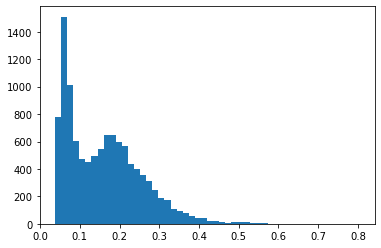

In [103]:
sub = np.mean(lst_sub,0)
print(sub.mean())
dfsub.target = sub
display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);